<a href="https://colab.research.google.com/github/arny617/MLNanodegree/blob/master/CryptoSentimentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
from fastai import *
from fastai.text import *
from scipy.spatial.distance import cosine as dist

In [4]:
torch.cuda.set_device(0)

In [7]:
import pandas as pd
import numpy as np
import OpenBlender
import json

In [8]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [6]:
#!pip install OpenBlender

     |████████████████████████████████| 61kB 4.9MB/s 
     |████████████████████████████████| 245kB 10.2MB/s 
  Created wheel for OpenBlender: filename=OpenBlender-2.6-cp36-none-any.whl size=6607 sha256=d22df22c6941f867c3d8961ef2e53298e027af780d849bcf8a3c31d7039a7cd5
  Stored in directory: /root/.cache/pip/wheels/fd/29/7b/377afef16a792ed174a9ade5a6707ef87843e214476d0c8205
Successfully built OpenBlender


In [9]:
api_token = '#####'

In [76]:
action = 'API_getObservationsFromDataset'# ANCHOR: 'Bitcoin vs USD'
  
parameters = { 
    'token' : api_token,
    'id_dataset' : '5d4c3af79516290b01c83f51',
    'date_filter':{"start_date" : "2020-01-01",
                   "end_date" : "2020-08-29"} }
df = pd.read_json(json.dumps(OpenBlender.call(action, parameters)['sample']), convert_dates=False, convert_axes=False).sort_values('timestamp', ascending=False)
df.reset_index(drop=True, inplace=True)
df['date'] = [OpenBlender.unixToDate(ts, timezone = 'GMT') for ts in df.timestamp]
df = df.drop('timestamp', axis = 1)

Task ID: '5fc5f5c10895fafb4a9d8d4b'.
Total estimated consumption: 5832.61 processing units.
Task confirmed. Starting download..
100.0 % completed.


In [77]:
df.describe()

,price,high,low,open
count,236.000000,236.000000,236.000000,236.000000
mean,8924.639831,9102.731780,8713.850000,8915.802966
std,1527.913626,1487.242123,1533.155692,1495.375999
min,4927.000000,5381.900000,4468.000000,5339.000000
25%,7969.025000,8140.225000,7694.625000,7892.775000
50%,9184.150000,9299.500000,9056.100000,9176.900000
75%,9678.950000,9859.700000,9464.350000,9672.500000
max,12300.000000,12415.000000,11927.200000,12300.000000


In [78]:
df['log_ret'] = np.log(df['price']) - np.log(df['open'])

In [79]:
df.sort_index(inplace=True,ascending=False)

In [38]:
df.tail()

,volume,price,high,low,open,change,date,log_ret
4,6.62K,18660.0,18944.5,18521.0,18669.0,-0.05%,21-11-2020 17:00:00,-0.000482
3,9.10K,18399.0,18668.0,18122.0,18660.0,-1.40%,22-11-2020 17:00:00,-0.014086
2,8.76K,18373.0,18655.0,18158.0,18399.0,-0.14%,23-11-2020 17:00:00,-0.001414
1,13.48K,18730.0,19303.0,18730.0,19134.8,-2.12%,25-11-2020 17:00:00,-0.021382
0,34.34K,17219.0,18824.0,16592.0,18727.0,-8.07%,26-11-2020 17:00:00,-0.083953


In [28]:
df.tail()

,volume,price,high,low,open,change,date,log_ret
153,3.69K,9452.1,9707.2,9402.6,9706.4,-2.62%,31-05-2020 17:00:00,-0.026549
94,5.83K,11350.0,11378.0,11038.0,11123.0,2.04%,31-07-2020 17:00:00,0.020203
67,2.24K,11671.0,11734.0,11639.1,11729.9,-0.50%,31-08-2020 17:00:00,-0.005034
22,8.95K,13788.0,13958.0,13499.0,13568.0,1.62%,31-10-2020 17:00:00,0.016085
306,2.99K,7208.3,7333.0,7161.3,7261.0,-0.72%,31-12-2019 17:00:00,-0.007284


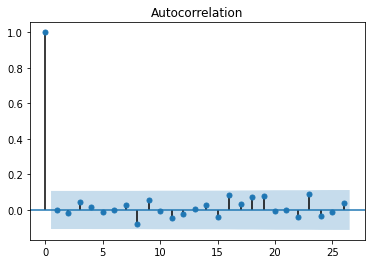

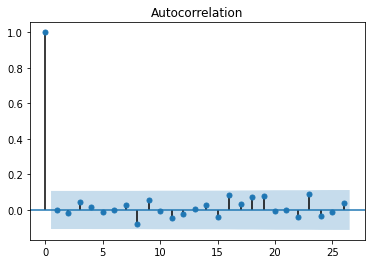

In [20]:
plot_acf(df['log_ret'])

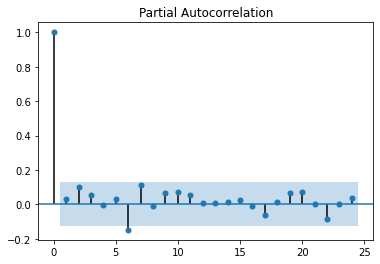

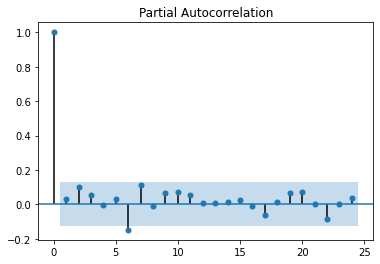

In [19]:
plot_pacf(df['log_ret'])

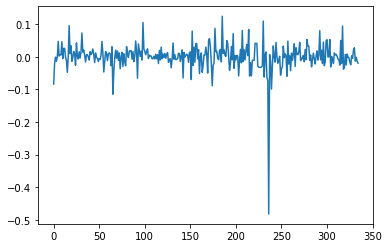

In [39]:
plt.plot(df['log_ret'])

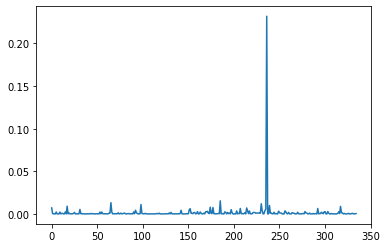

In [40]:
plt.plot(df['log_ret']**2)

In [23]:
df['price']

334     7450.1
333     7350.3
332     7336.0
331     7238.2
330     7440.0
        ...   
172     8811.4
141     9468.3
112     9315.8
84     11591.0
40     11560.0
Name: price, Length: 335, dtype: float64

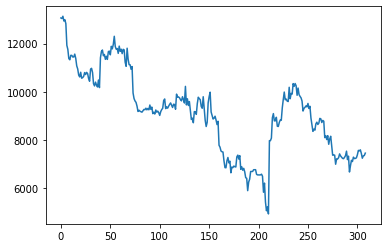

In [60]:
plt.plot(df['price'])

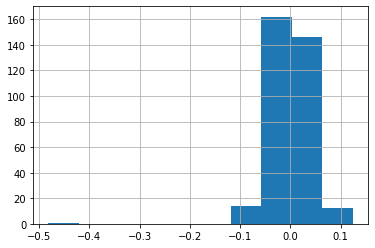

In [42]:
df['log_ret'].hist()

In [80]:
df['target'] = [1 if log_diff > 0 else 0 for log_diff in df['log_ret']]

In [81]:
df.reset_index(inplace=True)
df.head()

,index,volume,price,high,low,open,change,date,log_ret,target
0,235,2.07K,7212.7,7268.8,7185.4,7208.2,0.06%,01-01-2020 17:00:00,0.000624,1
1,234,4.85K,6989.4,7225.2,6963.0,7212.7,-3.10%,02-01-2020 17:00:00,-0.031449,0
2,233,6.68K,7367.5,7437.6,6909.3,6989.4,5.41%,03-01-2020 17:00:00,0.052684,1
3,232,4.27K,7369.8,7422.0,7297.7,7371.8,0.03%,04-01-2020 17:00:00,-0.000271,0
4,231,4.45K,7364.6,7509.9,7315.8,7370.3,-0.07%,05-01-2020 17:00:00,-0.000774,0


In [82]:
format = '%d-%m-%Y %H:%M:%S'
timezone = 'GMT'
df['u_timestamp'] = OpenBlender.dateToUnix(df['date'], 
                                           date_format = format, 
                                           timezone = timezone)
df = df[['date', 'u_timestamp', 'price', 'target']]
df.head()

,date,u_timestamp,price,target
0,01-01-2020 17:00:00,1.577898e+09,7212.7,1
1,02-01-2020 17:00:00,1.577984e+09,6989.4,0
2,03-01-2020 17:00:00,1.578071e+09,7367.5,1
3,04-01-2020 17:00:00,1.578157e+09,7369.8,0
4,05-01-2020 17:00:00,1.578244e+09,7364.6,0


In [83]:
search_keyword = 'bitcoin'
df = df.sort_values('u_timestamp').reset_index(drop = True)
print('From : ' + OpenBlender.unixToDate(min(df.u_timestamp)))
print('Until: ' + OpenBlender.unixToDate(max(df.u_timestamp)))
OpenBlender.searchTimeBlends(api_token,df.u_timestamp,search_keyword)

From : 01-01-2020 17:00:00
Until: 28-08-2020 17:00:00


[{'description': 'Daily prices and volumes for the digital currency BitcoinsCash.',
  'features': ['close',
   'high',
   'low',
   'market_cap',
   'open',
   'timestamp',
   'volume'],
  'id_dataset': '5d9f899b951629329a748593',
  'intersection': '100%',
  'name': 'Bitcoins Cash Historical data',
  'num_observations': 1182,
  'url': 'https://www.openblender.io/#/dataset/explore/5d9f899b951629329a748593'},
 {'description': 'Daily Price of Bitcoin SV',
  'features': ['change',
   'high',
   'low',
   'open',
   'price',
   'timestamp',
   'volume'],
  'id_dataset': '5db7a7c99516294f3f6c2faf',
  'intersection': '100%',
  'name': 'Bitcoin SV Price',
  'num_observations': 317,
  'url': 'https://www.openblender.io/#/dataset/explore/5db7a7c99516294f3f6c2faf'},
 {'description': 'Daily Price of Bitcoin Gold',
  'features': ['change',
   'high',
   'low',
   'open',
   'price',
   'timestamp',
   'volume'],
  'id_dataset': '5db7aa0b9516294f3f6c30ca',
  'intersection': '100%',
  'name': 'Bitcoi

In [66]:
!pip install fsspec

     |████████████████████████████████| 92kB 5.0MB/s 


In [181]:
alt_source = {
                'id_dataset':'5ea20ec595162936337159b4',
                'feature' : 'text'
            }
# Now, let's 'timeBlend' it to our dataset
df_blend_alt = OpenBlender.timeBlend( token = api_token,
                                  anchor_ts = df.u_timestamp,
                                  blend_source = alt_source,
                                  blend_type = 'agg_in_intervals',
                                  interval_size = 60 * 60 * 24,
                                  direction = 'time_prior',
                                  interval_output = 'list',
                                  missing_values = 'raw')

Task ID: '5fc5fc640895fafb4a9d8d4c'.
Total estimated consumption: 9440.0 processing units.
Task confirmed. Starting download..
100%


In [182]:
df_blend_alt.head()

,timestamp,COINNOUNCE.text_COUNT_last1days,COINNOUNCE.text_last1days
0,1577898000,0,[]
1,1577984400,0,[]
2,1578070800,0,[]
3,1578157200,0,[]
4,1578243600,0,[]


In [84]:
# We need to add the 'id_dataset' and the 'feature' name we want.

blend_source = {
                'id_dataset':'5ea2039095162936337156c9',
                'feature' : 'text'
            }
# Now, let's 'timeBlend' it to our dataset
df_blend = OpenBlender.timeBlend( token = api_token,
                                  anchor_ts = df.u_timestamp,
                                  blend_source = blend_source,
                                  blend_type = 'agg_in_intervals',
                                  interval_size = 60 * 60 * 24,
                                  direction = 'time_prior',
                                  interval_output = 'list',
                                  missing_values = 'raw')
df = pd.concat([df, df_blend.loc[:, df_blend.columns != 'u_timestamp']], axis = 1)
df.head()

Task ID: '5fc5f5f60895fafb4a9d8d4c'.
Total estimated consumption: 9440.0 processing units.
Task confirmed. Starting download..
100%


,date,u_timestamp,price,target,timestamp,BITCOIN_NE.text_COUNT_last1days,BITCOIN_NE.text_last1days
0,01-01-2020 17:00:00,1.577898e+09,7212.7,1,1577898000,3,[etoro ceo yoni assia on reaching 12 million u...
1,02-01-2020 17:00:00,1.577984e+09,6989.4,0,1577984400,7,[government confirms crypto profits not taxabl...
2,03-01-2020 17:00:00,1.578071e+09,7367.5,1,1578070800,8,[ticker tool uses the bch blockchain to provid...
3,04-01-2020 17:00:00,1.578157e+09,7369.8,0,1578157200,6,[crypto fundraising is changing again in 2020 ...
4,05-01-2020 17:00:00,1.578244e+09,7364.6,0,1578243600,5,[subhash chandra garg on the future of crypto ...


In [383]:
df['text'] = df['BITCOIN_NE.text_last1days'].apply(lambda x:"xxeos ".join(x))
#df['text'] = df['BITCOIN_NE.text_last1days']

In [119]:
df['count'] = df['BITCOIN_NE.text_COUNT_last1days']

In [379]:
df.head()

,date,u_timestamp,price,target,timestamp,BITCOIN_NE.text_COUNT_last1days,BITCOIN_NE.text_last1days,text
0,01-01-2020 17:00:00,1.577898e+09,7212.7,1,1577898000,3,[etoro ceo yoni assia on reaching 12 million u...,etoro ceo yoni assia on reaching 12 million us...
1,02-01-2020 17:00:00,1.577984e+09,6989.4,0,1577984400,7,[government confirms crypto profits not taxabl...,government confirms crypto profits not taxable...
2,03-01-2020 17:00:00,1.578071e+09,7367.5,1,1578070800,8,[ticker tool uses the bch blockchain to provid...,ticker tool uses the bch blockchain to provide...
3,04-01-2020 17:00:00,1.578157e+09,7369.8,0,1578157200,6,[crypto fundraising is changing again in 2020 ...,crypto fundraising is changing again in 2020 x...
4,05-01-2020 17:00:00,1.578244e+09,7364.6,0,1578243600,5,[subhash chandra garg on the future of crypto ...,subhash chandra garg on the future of crypto x...


In [384]:
df['text'].values

array(['etoro ceo yoni assia on reaching 12 million users and why cryptos are a gateway to stocks xxeos china takes another step away from usd hegemony xxeos veriblock captured close to 60 of btcs op return transactions in 2019 ',
       'government confirms crypto profits not taxable in south korea xxeos wifi sharing platform wicrypt gets government grant in nigeria xxeos tronbased tether has ballooned to over 900 million tokens almost 22 of total supply xxeos these are the bitcoin stories you loved in 2019 xxeos alleged 8b btc tulip trust expires with tales of bonded couriers xxeos using a vpn may get israeli crypto traders in trouble xxeos why nick szabo probably isnt satoshi ',
       'ticker tool uses the bch blockchain to provide reliable rate data xxeos was youtubes christmas crypto purge illegal xxeos early cypherpunk emails reveal a blueprint for bitcoin xxeos google restores metamask app after community uproar xxeos btcs hashrate touches 120 exahash but the price has not foll

In [183]:
df['BITCOIN_NE.text_last1days'].apply(lambda x:["".join(k) for k in x])

0      [etoro ceo yoni assia on reaching 12 million u...
1      [government confirms crypto profits not taxabl...
2      [ticker tool uses the bch blockchain to provid...
3      [crypto fundraising is changing again in 2020 ...
4      [subhash chandra garg on the future of crypto ...
                             ...                        
231                                                   []
232                                                   []
233                                                   []
234                                                   []
235                                                   []
Name: BITCOIN_NE.text_last1days, Length: 236, dtype: object

In [35]:
from fastai.text import *

In [546]:
data = (TextList.from_df(df, cols='text')
                .split_by_rand_pct(0.2,seed=42)
                .label_for_lm()  
                .databunch(bs=8))
data.show_batch()

idx,text
0,xxunk xxunk of total supply xxeos these are the bitcoin xxunk you xxunk in 2019 xxeos alleged xxunk btc xxunk trust xxunk with xxunk of xxunk xxunk xxeos using a xxunk may get xxunk crypto traders in xxunk xxeos why xxunk xxunk xxunk is nt satoshi xxbos xxunk tool xxunk the bch blockchain to xxunk reliable rate data xxeos was xxunk xxunk crypto xxunk illegal xxeos early xxunk xxunk reveal
1,interest rates xxbos xxunk is a xxunk xxunk noncustodial bitcoin wallet xxeos xxunk digital currency link to be available in japan as early as xxunk 2020 xxeos coronavirus outbreak forces chinese crypto asic xxunk to xxunk xxunk xxeos xxunk announces own cryptocurrency as more xxunk xxunk about chinas digital yuan xxeos bitcoin xxunk new project aims to xxunk bitcoin cash node xxunk xxeos us xxunk want to ban xxunk encryption
2,attacks inflation and xxunk xxunk xxeos xxunk xxunk xxunk 3 billion for 15 years of illegal xxunk xxunk millions of customers xxeos no xxunk on human rights why encryption can not be xxunk xxeos how the irs xxunk cryptocurrency tax returns xxunk xxunk shares xxunk xxunk on xxunk xxunk xxeos get xxunk for the bitcoin halving here are 9 xxunk xxunk you can monitor xxbos xxunk joins libra while xxunk
3,people are fed up with wall street banks and oligarchs xxeos cash crisis national currencies plunge in the wake of coronavirus xxeos how to buy weed with bitcoin xxbos regulatory roundup crypto regulations advance despite global crisis cash shortages bank closures xxeos crypto mining crunch time bitcoin halving less than 50 days away while global economy shudders xxeos shelterinplace for cash 2 bills submitted by us congress mention digital dollars
4,noncustodial xxunk app xxeos south africa proposes 30 rules to regulate cryptocurrency xxeos largest us banks xxunk xxunk in loan xxunk profits plunge xxeos xxunk money printing xxunk housing prices slide xxunk first time in 10 years in xxunk europe xxbos xxunk xxunk new cryptocurrency derivatives platform xxunk to offer regulated bitcoin futures xxeos cryptocurrency markets moved by regulatory xxunk federal reserve bank paper shows xxeos federal reserve xxunk the


In [547]:
### Fit bitcoin wikitext model with domain specific data
learn = language_model_learner(data,AWD_LSTM, drop_mult=0.2)

In [548]:
# select the appropriate learning rate
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


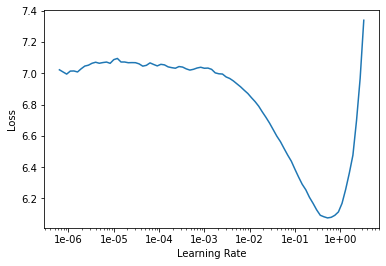

In [549]:
learn.recorder.plot()

In [550]:
bs = 48
lr = 1e-3
lr *= bs/48

In [390]:
learn.to_fp16()

LanguageLearner(data=TextLMDataBunch;

Train: LabelList (213 items)
x: LMTextList
xxbos xxunk ceo xxunk xxunk on xxunk 12 million users and why cryptos are a gateway to stocks xxeos china takes another xxunk away from usd xxunk xxeos xxunk xxunk close to 60 of btcs xxunk return transactions in 2019,xxbos government confirms crypto profits not xxunk in south korea xxeos xxunk sharing platform xxunk gets government xxunk in xxunk xxeos xxunk tether has xxunk to over xxunk million tokens xxunk xxunk of total supply xxeos these are the bitcoin xxunk you xxunk in 2019 xxeos alleged xxunk btc xxunk trust xxunk with xxunk of xxunk xxunk xxeos using a xxunk may get xxunk crypto traders in xxunk xxeos why xxunk xxunk xxunk is nt satoshi,xxbos xxunk tool xxunk the bch blockchain to xxunk reliable rate data xxeos was xxunk xxunk crypto xxunk illegal xxeos early xxunk xxunk reveal a xxunk for bitcoin xxeos google xxunk xxunk app after community xxunk xxeos btcs hashrate touches 120 exahash but the

In [400]:
learn.fit_one_cycle(5, lr*10, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,6.763787,5.356676,0.290179,00:00
1,5.989963,4.914351,0.309375,00:00


In [401]:
learn.unfreeze()

In [402]:
learn.fit_one_cycle(10, lr, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,5.005364,4.729844,0.312054,00:00
1,4.844512,4.501637,0.310714,00:00
2,4.674469,4.354737,0.312500,00:00
3,4.415829,4.191204,0.313393,00:00
4,4.120901,4.174580,0.309821,00:00
5,3.807005,4.253040,0.311607,00:00
6,3.503252,4.359972,0.287500,00:00
7,3.220058,4.494367,0.283036,00:00
8,2.969972,4.548319,0.291071,00:00
9,2.767590,4.552797,0.285268,00:00


In [403]:
learn.save('fine_tuned')
learn.save_encoder('fine_tuned_enc')

In [551]:


# # we typically find the point where the slope is steepest
# learn.recorder.plot()

# Fit the model based on selected learning rate
learn.fit_one_cycle(5, 1e-2, moms=(0.8,0.7))

# Tune a little more
learn.unfreeze()
learn.fit_one_cycle(5, 1e-3, moms=(0.8,0.7))

# # Save the encoder for use in classification
learn.save_encoder('fine_tuned_enc')

epoch,train_loss,valid_loss,accuracy,time
0,6.501153,5.139413,0.304762,00:01
1,5.362646,4.031166,0.324107,00:01
2,4.635604,3.847102,0.325893,00:01
3,4.138627,3.771044,0.341964,00:01
4,3.796293,3.769934,0.337798,00:01


epoch,train_loss,valid_loss,accuracy,time
0,3.256077,3.696300,0.356250,00:01
1,3.119638,3.674778,0.373512,00:01
2,2.751764,3.834324,0.357738,00:01
3,2.268389,4.018411,0.333631,00:01
4,1.868840,4.138062,0.338095,00:01


### Refit model with classification label

In [552]:
#test_datalist = TextList.from_df(test, cols='text', vocab=data.vocab)
data_clas = (TextList.from_df(df, cols=['text'], vocab=data.vocab)
             .split_by_rand_pct(0.2,seed=42)
             .label_from_df(cols= 'target')
             .databunch(bs=48))

data_clas.show_batch()

text,target
xxbos world markets xxunk trading accounts xxeos xxunk xxunk stock market traders while cryptocurrency investors become xxunk xxeos indian state governments blockchain xxunk now has a xxunk xxunk for blockchain startups xxeos public sale is live for coin xxunk xxunk xxunk xxunk xxunk privacy xxunk xxunk network xxeos xxunk xxunk allows telegram users to xxunk people in xxunk xxunk with any slp token xxeos xxunk xxunk crypto exchange 2 months,1
xxbos xxunk digital assets to xxunk bitcoin private keys for xxunk trust xxunk xxeos grayscale crypto investments add xxunk 1 billion in q2 bitcoin trust xxunk record quarter xxeos massive twitter attack apple xxunk xxunk elon musk bill xxunk xxunk xxunk xxunk xxunk bitcoin giveaway scam xxeos popular xxunk xxunk xxunk xxunk will xxunk the bitcoin xxunk while xxunk xxeos study exchanges xxunk 13 billion in bitcoin xxunk from xxunk,0
xxbos xxunk study xxunk us xxunk xxunk market is leading the xxunk xxeos google facebook twitter face classaction lawsuit for banning crypto xxunk xxeos xxunk enters the top 100 xxunk and launches on httpbitcoincom exchange xxeos bitcoin security xxunk how to xxunk a 2 of 2 xxunk bch wallet xxeos xxunk xxunk xxunk bitcoin xxunk xxunk calls xxunk xxunk xxunk xxeos grayscale investments bitcoin cash trust approved for public trading,1
xxbos bank of england still xxunk creation of central bank digital currency says xxunk xxeos investor charged in us after xxunk covid19 relief loan to trade cryptocurrency xxeos us xxunk xxunk xxunk on tools to track cryptocurrency transactions xxeos xxunk xxunk market cap xxunk xxunk of eth in xxunk by 2 billion xxeos covid19 stimulus banks will gain xxunk billion in fees for xxunk xxunk relief loans xxeos a xxunk,0
xxbos xxunk now xxunk xxunk holders to earn up to ten xxunk interest on their digital assets xxeos users of httpbitcoincom exchange can win rewards worth xxunk in xxunk trading competition xxeos fed chair powell reveals us response to chinas digital yuan libra public payments ledger xxeos bitcoin cash xxunk more than 10 of darknet sales last month xxeos from star xxunk to xxunk xxunk bitcoin sv xxunk to xxunk,1


In [634]:
learn_classifier = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.6,metrics=[Precision(average='micro')])

# load the encoder saved  
learn_classifier.load_encoder('fine_tuned_enc')

learn_classifier.freeze()

In [635]:
# select the appropriate learning rate
learn_classifier.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


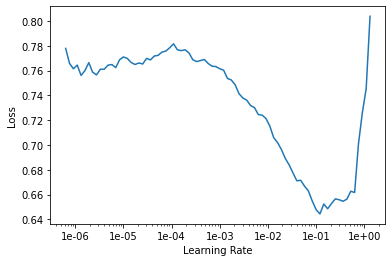

In [636]:
# we typically find the point where the slope is steepest
learn_classifier.recorder.plot()

In [639]:
# Fit the model based on selected learning rate
learn_classifier.fit_one_cycle(1, 2e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,precision,time
0,0.730733,0.798756,0.425532,00:00


In [640]:
# Tune a little more
learn_classifier.freeze_to(-2)
learn_classifier.fit_one_cycle(1, slice(1e-2/(2.6**4),1e-2), moms=(0.8,0.7))

epoch,train_loss,valid_loss,precision,time
0,0.623243,1.063565,0.468085,00:00


In [644]:
# Tune a little more
learn_classifier.freeze_to(-3)
learn_classifier.fit_one_cycle(1, slice(5e-3/(2.6**4),5e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,precision,time
0,0.529739,0.928259,0.425532,00:00


In [650]:
#learn_classifier.unfreeze()
learn_classifier.fit_one_cycle(5, slice(2e-3/(2.6**4),2e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,precision,time
0,0.195995,0.844209,0.574468,00:00
1,0.203365,0.790378,0.638298,00:00
2,0.206876,0.788123,0.638298,00:00
3,0.187807,0.807653,0.659575,00:00
4,0.190731,0.817091,0.659575,00:00


In [651]:
learn_classifier.show_results()

text,target,prediction
xxbos bitcoin an option as xxunk xxunk says xxunk s xxunk xxunk gold market xxeos indian government confirms crypto bill is xxunk approval xxeos crypto exchange xxunk xxunk to list on xxunk in xxunk xxeos bitcoin exchange reserves drop to a xxunk low xxunk bullish xxunk xxeos bitcoin cash xxunk launches xxunk xxunk xxunk to celebrate the xxunk bch xxunk xxeos stimulus is xxunk global banks to xxunk support xxunk,1,1
xxbos 14 m in bitcoin transactions new high for xxunk as xxunk in the xxunk xxunk xxeos chinas xxunk xxunk service xxunk to xxunk the central banks digital yuan xxeos xxunk token is live on xxunk the leading european bitcoin exchange xxeos xxunk xxunk xxunk xxunk xxunk last xxunk post was about bitcoin xxeos bitcoin is not a privacy coin says crypto xxunk xxunk xxunk xxeos john mcafee launches xxunk,0,0
xxbos australian xxunk xxunk two years for xxunk 3 xxrep 5 0 worth of xrp xxeos russia xxunk xxunk system to monitor cryptocurrency transactions xxunk now in use xxeos xxunk xxunk xxunk to xxunk tax in cryptocurrency xxunk xxeos defi project xxunk finance sees over 500 m xxunk in 24 hours devs reveal contract xxunk xxeos high fees make btc less xxunk for xxunk in africa xxunk xxunk xxunk xxunk,1,1
xxbos bitcoin xxunk launches xxunk xxunk as xxunk xxunk toward xxunk its own digital currency xxeos bitcoin xxunk xxunk xxunk billion worth of btc for just 7 xxeos dollar crash imminent former xxunk xxunk xxunk xxunk xxunk xxunk predicts xxeos crypto card xxunk xxunk missing xxunk billion cash company shares plunge xxunk xxeos how bitcoin of xxunk xxunk xxunk program xxunk xxunk the xxunk of xxunk a million dollars to,0,1
xxbos xxunk value xxunk is now xxunk by stablecoins xxeos us bank xxunk sees growth in crypto xxunk despite xxunk xxunk from the xxunk xxeos google xxunk from india joins coinbase as xxunk xxunk xxunk xxeos xxunk token is now xxunk for trading on httpbitcoincom exchange and users can win 1 million xxunk xxeos bank xxunk expands xxunk of crypto assets to offer trading and xxunk services for bitcoin cash,0,1


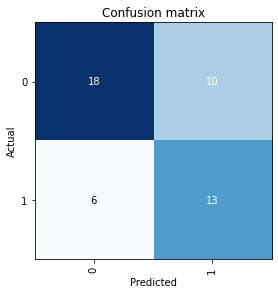

In [652]:
interp = ClassificationInterpretation.from_learner(learn_classifier)
interp.plot_confusion_matrix()

In [576]:
y_valid = interp.data.valid_ds.y.items

In [577]:
y_pred = interp.pred_class.numpy()

In [653]:
from sklearn.metrics import classification_report
print(classification_report(y_valid,
                            y_pred,
                            target_names= ['0', '1']))


              precision    recall  f1-score   support

           0       0.78      0.64      0.71        28
           1       0.58      0.74      0.65        19

    accuracy                           0.68        47
   macro avg       0.68      0.69      0.68        47
weighted avg       0.70      0.68      0.68        47



In [180]:
from sklearn.metrics import roc_curve
false_positive_rate, true_positive_rate, threshold = roc_curve(y_valid,
                                                               y_pred)